# Nasdaq Composite 日足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'IXIC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='1y', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-25 00:00:00-04:00,16335.299805,16441.169922,16315.719727,16384.470703,4636940000,0.0,0.0
2024-03-26 00:00:00-04:00,16446.849609,16476.380859,16312.950195,16315.700195,5144260000,0.0,0.0
2024-03-27 00:00:00-04:00,16424.759766,16431.820312,16279.169922,16399.519531,4768930000,0.0,0.0
2024-03-28 00:00:00-04:00,16377.230469,16420.919922,16347.379883,16379.459961,5174450000,0.0,0.0
2024-04-01 00:00:00-04:00,16397.050781,16490.650391,16327.889648,16396.830078,4798390000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-18 00:00:00-04:00,17662.570312,17682.919922,17431.669922,17504.119141,6450530000,0.0,0.0
2025-03-19 00:00:00-04:00,17590.119141,17917.539062,17533.939453,17750.789062,6302310000,0.0,0.0
2025-03-20 00:00:00-04:00,17586.060547,17903.199219,17576.820312,17691.630859,6098330000,0.0,0.0


In [3]:
df0 = ticker.history(period='3y', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-25 00:00:00-04:00,14194.719727,14218.759766,14010.790039,14169.299805,5585100000,0.0,0.0
2022-03-28 00:00:00-04:00,14177.209961,14356.000000,14101.339844,14354.900391,5129500000,0.0,0.0
2022-03-29 00:00:00-04:00,14500.389648,14646.900391,14419.400391,14619.639648,6060890000,0.0,0.0
2022-03-30 00:00:00-04:00,14558.589844,14609.250000,14383.450195,14442.269531,5479200000,0.0,0.0
2022-03-31 00:00:00-04:00,14444.780273,14456.740234,14217.719727,14220.519531,5453890000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-18 00:00:00-04:00,17662.570312,17682.919922,17431.669922,17504.119141,6450530000,0.0,0.0
2025-03-19 00:00:00-04:00,17590.119141,17917.539062,17533.939453,17750.789062,6302310000,0.0,0.0
2025-03-20 00:00:00-04:00,17586.060547,17903.199219,17576.820312,17691.630859,6098330000,0.0,0.0


## Moving Median

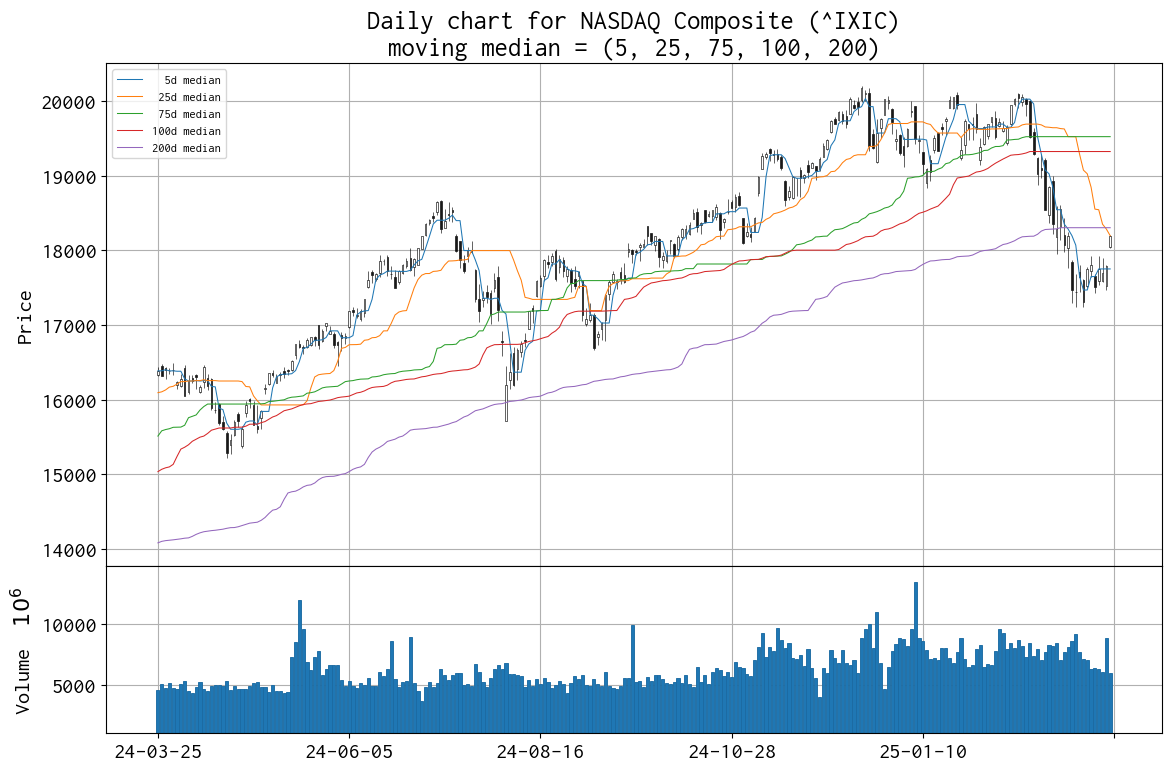

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm005 = df0['Close'].rolling(5).median()
mm025 = df0['Close'].rolling(25).median()
mm075 = df0['Close'].rolling(75).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(mm005[df.index], width=0.75, label='  5d median', ax=ax[0]),
    mpf.make_addplot(mm025[df.index], width=0.75, label=' 25d median', ax=ax[0]),
    mpf.make_addplot(mm075[df.index], width=0.75, label=' 75d median', ax=ax[0]),
    mpf.make_addplot(mm100[df.index], width=0.75, label='100d median', ax=ax[0]),
    mpf.make_addplot(mm200[df.index], width=0.75, label='200d median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Daily chart for %s (%s)\nmoving median = (5, 25, 75, 100, 200)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('report_daily_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-21 00:00:00-04:00,17519.839844,17798.060547,17474.810547,17784.050781,8837930000,0.0,0.0
2025-03-24 00:00:00-04:00,18046.199219,18210.046875,18030.683594,18188.591797,5992265000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-21 00:00:00-04:00    17784.050781
2025-03-24 00:00:00-04:00    18188.591797
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-21 00:00:00-04:00           NaN
2025-03-24 00:00:00-04:00    404.541016
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-24 00:00:00-04:00    142.392578
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-03-18 00:00:00-04:00    17648.449219
2025-03-19 00:00:00-04:00    17648.449219
2025-03-20 00:00:00-04:00    17648.449219
2025-03-21 00:00:00-04:00    17691.630859
2025-03-24 00:00:00-04:00    17750.789062
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-03-18 00:00:00-04:00    17808.660156
2025-03-19 00:00:00-04:00    17754.089844
2025-03-20 00:00:00-04:00    17750.789062
2025-03-21 00:00:00-04:00    17750.789062
2025-03-24 00:00:00-04:00    17750.789062
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-03-18 00:00:00-04:00    18700.004883
2025-03-19 00:00:00-04:00    18548.575195
2025-03-20 00:00:00-04:00    18447.304688
2025-03-21 00:00:00-04:00    18317.674805
2025-03-24 00:00:00-04:00    18240.690430
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-03-18 00:00:00-04:00    19484.280273
2025-03-19 00:00:00-04:00    19484.280273
2025-03-20 00:00:00-04:00    19484.280273
2025-03-21 00:00:00-04:00    19435.420898
2025-03-24 00:00:00-04:00    19366.895508
Name: Close, dtype: float64

## Robust Bollinger's bands

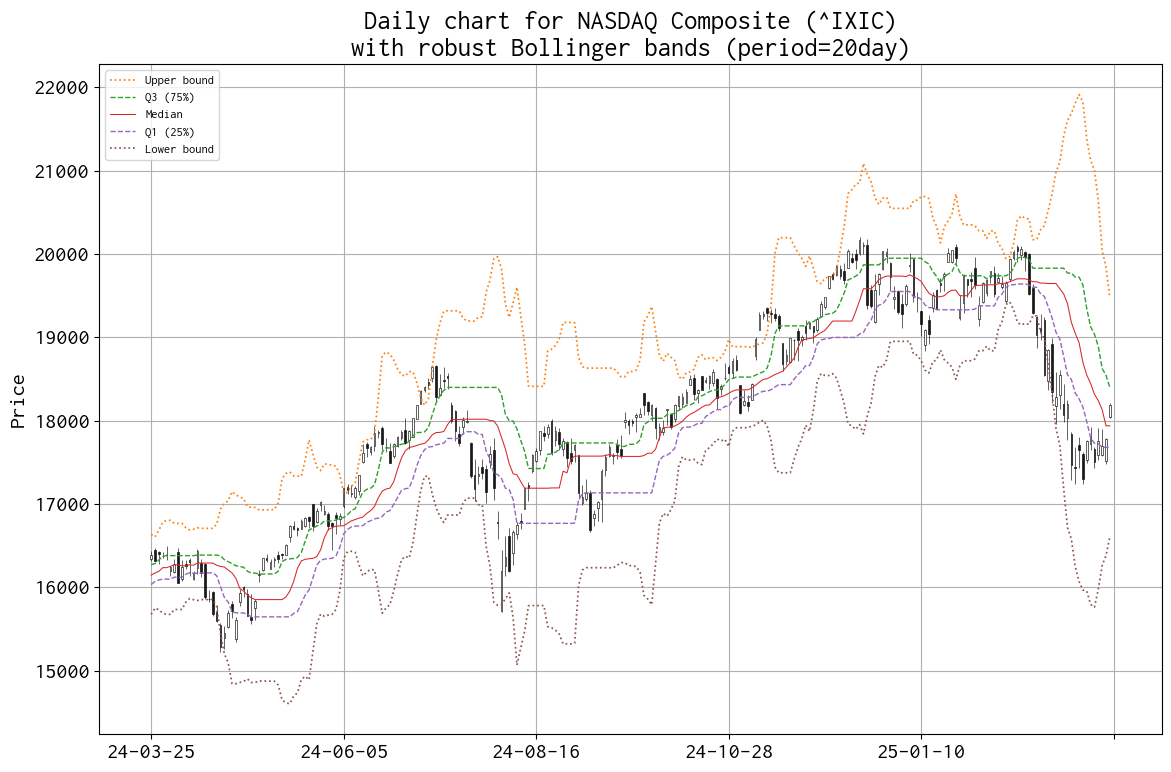

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 20
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith robust Bollinger bands (period=%dday)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Daily chart for %s\nwith robust Bollinger bands (period=%dday)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_daily_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

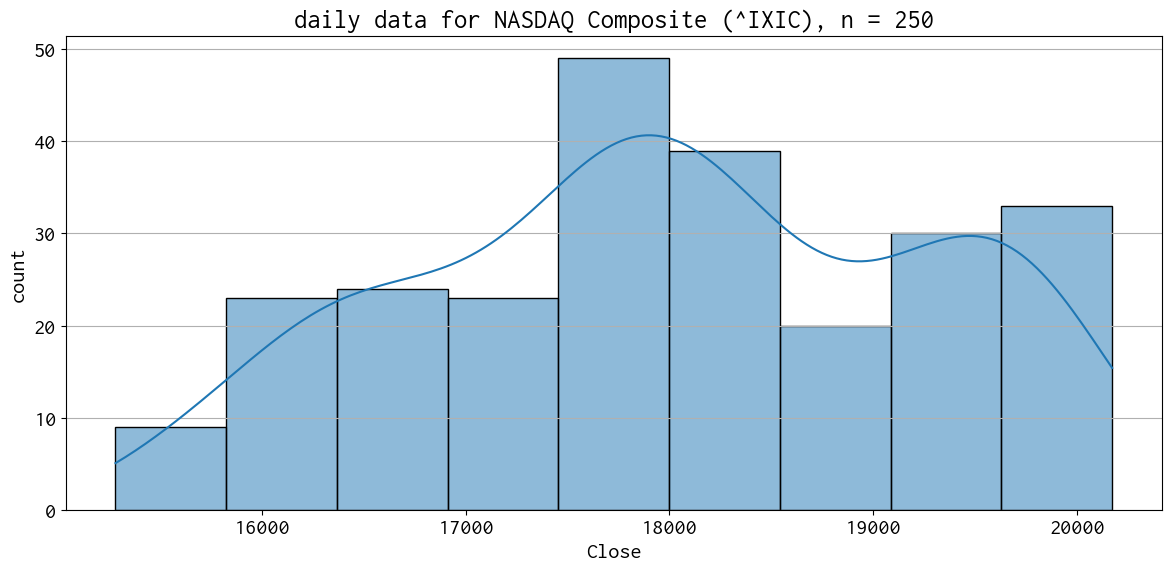

In [14]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_daily_histogram_%s.png' % code)
plt.show()